## 1. Import and process data
    
    - In this section, I import the data from files and normalize it, then I split the data to training and test sets
    
### 1.1. Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from keras import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

### 1.2. Import data
    - Import data from excel files using pandas, change nan values with 0 and convert it to numpy array

In [2]:
X = pd.read_excel(r'Elearning-Data-cut.xls', sheet_name=0).fillna(0).to_numpy()
y1 = pd.read_excel(r'Elearning-Data-cut.xls', sheet_name=1).fillna(0).to_numpy()
y2 = pd.read_excel(r'Elearning-Data-cut.xls', sheet_name=2, usecols=[0]).fillna(0).to_numpy()

### 1.3. Normalize data
    - Normalizing features using Standard Scalar from sklearn

In [3]:
sc = StandardScaler()
X = sc.fit_transform(X)

### 1.4. Split data
    - Splitting data in train and test sets using train_test_split method from sklearn

In [4]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.1)


print(X_train.shape)
print(X_test.shape)

print(y1_train.shape)
print(y1_test.shape)

print(y2_train.shape)
print(y2_test.shape)

(666, 28)
(74, 28)
(666, 1)
(74, 1)
(666, 1)
(74, 1)


## 2. Building the binary classifier model and regression model
    
    - In this section, I build 2 training models using Keras
    
    - For binary classification I use a 3 layer neural network (2 hidden and 1 output), each containing 200, 100 and 1 neuron respectively.
    
    - For regression I use a 3 layer neural network (2 hidden and 1 output), each containing 200, 100 and 1 neuron respectively. After each layer's activation, I use a BatchNormalization layer for normalizing outputs.
    
### 2.1. Building binary classifier model

In [5]:
classifier = Sequential()

# Batch Normalization Layer
classifier.add(BatchNormalization())

# First Hidden Layer
classifier.add(Dense(300, activation='relu', kernel_initializer='random_normal'))

# Second  Hidden Layer
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal'))

# Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

# using adam optimizer alongside with binary cross entropy loss function
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['mean_squared_error','accuracy'])

### 2.2. Building regression model

In [6]:
model = Sequential()

# Batch Normalization Layer
model.add(BatchNormalization())

# First Hidden Layer
model.add(Dense(200, activation='relu', kernel_initializer='random_normal'))

# Batch Normalization Layer
model.add(BatchNormalization())

# Second  Hidden Layer
model.add(Dense(100, activation='relu', kernel_initializer='random_normal'))

# Batch Normalization Layer
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1, kernel_initializer='normal'))

# using adam optimizer alongside with mean suared loss function
model.compile(optimizer ='adam',loss='mse', metrics =['mean_squared_error'])

## 3. Training and evaluation

### 3.1. Binary Classification

In [7]:
progress = classifier.fit(X_train,y2_train, batch_size=32, epochs=200)

Epoch 1/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4713 - mean_squared_error: 0.1525 - accuracy: 0.8183
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.3499 - mean_squared_error: 0.1123 - accuracy: 0.8378
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 0.3087 - mean_squared_error: 0.0997 - accuracy: 0.8468
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2824 - mean_squared_error: 0.0912 - accuracy: 0.8619
Epoch 5/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2623 - mean_squared_error: 0.0859 - accuracy: 0.8694
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2473 - mean_squared_error: 0.0794 - accuracy: 0.8799
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2308 - mean_squared_error: 0.0735 - accuracy: 0.8874
Epoch 8/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2316 - mean_squared_error: 0.

21/21 [==============================] - 0s 1ms/step - loss: 0.0083 - mean_squared_error: 0.0017 - accuracy: 0.9985
Epoch 65/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_squared_error: 4.5522e-04 - accuracy: 1.0000
Epoch 66/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_squared_error: 4.1477e-04 - accuracy: 1.0000
Epoch 67/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_squared_error: 6.5787e-04 - accuracy: 1.0000
Epoch 68/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0027 - accuracy: 0.9955
Epoch 69/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0021 - accuracy: 0.9985
Epoch 70/200
21/21 [==============================] - 0s 999us/step - loss: 0.0078 - mean_squared_error: 0.0017 - accuracy: 0.9985
Epoch 71/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0146 - mean_squared_

21/21 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 7.1953e-05 - accuracy: 1.0000
Epoch 127/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 2.5721e-04 - accuracy: 1.0000
Epoch 128/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 2.5114e-04 - accuracy: 1.0000
Epoch 129/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 7.1622e-04 - accuracy: 0.9985
Epoch 130/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 4.8756e-04 - accuracy: 1.0000
Epoch 131/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 4.5775e-04 - accuracy: 1.0000
Epoch 132/200
21/21 [==============================] - 0s 1ms/step - loss: 9.2373e-04 - mean_squared_error: 2.2747e-05 - accuracy: 1.0000
Epoch 133/200
21/21 [==============================] - 0s 1ms/step - los

21/21 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0024 - accuracy: 0.9970
Epoch 188/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0023 - accuracy: 0.9955
Epoch 189/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0049 - mean_squared_error: 7.7882e-04 - accuracy: 1.0000
Epoch 190/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 4.2664e-04 - accuracy: 1.0000
Epoch 191/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 4.5823e-04 - accuracy: 0.9985
Epoch 192/200
21/21 [==============================] - 0s 1ms/step - loss: 8.1113e-04 - mean_squared_error: 4.8833e-05 - accuracy: 1.0000
Epoch 193/200
21/21 [==============================] - 0s 1ms/step - loss: 8.1925e-04 - mean_squared_error: 3.1420e-05 - accuracy: 1.0000
Epoch 194/200
21/21 [==============================] - 0s 1ms/step - loss: 9

In [8]:
print('\nEvaluation result:')
eval_model=classifier.evaluate(X_test, y2_test)


Evaluation result:
3/3 [==============================] - 0s 1ms/step - loss: 1.2989 - mean_squared_error: 0.1215 - accuracy: 0.8649


In [9]:
# Calculating the Confusion Matrix

y_pred=classifier.predict(X_test)
y_pred =(y_pred > 0.5)

cm = confusion_matrix(y2_test, y_pred)
print(cm)

[[ 5  9]
 [ 1 59]]


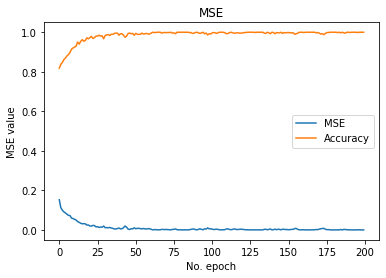

In [10]:
# Plotting error and accuracy in training

plt.plot(progress.history['mean_squared_error'], label='MSE')
plt.plot(progress.history['accuracy'], label='Accuracy')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="center right")
plt.show()

### 3.2. Regression

In [ ]:
progress = model.fit(X_train,y1_train, batch_size=32, epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 1ms/step - loss: 200.3454 - mean_squared_error: 200.3454
Epoch 2/1000
21/21 [==============================] - 0s 1ms/step - loss: 194.7979 - mean_squared_error: 194.7979
Epoch 3/1000
21/21 [==============================] - 0s 1ms/step - loss: 187.6591 - mean_squared_error: 187.6591
Epoch 4/1000
21/21 [==============================] - 0s 1ms/step - loss: 175.9115 - mean_squared_error: 175.9115
Epoch 5/1000
21/21 [==============================] - 0s 1ms/step - loss: 159.3386 - mean_squared_error: 159.3386
Epoch 6/1000
21/21 [==============================] - 0s 1ms/step - loss: 138.4619 - mean_squared_error: 138.4619
Epoch 7/1000
21/21 [==============================] - 0s 1ms/step - loss: 115.0455 - mean_squared_error: 115.0455
Epoch 8/1000
21/21 [==============================] - 0s 1ms/step - loss: 90.6294 - mean_squared_error: 90.6294
Epoch 9/1000
21/21 [==============================] - 0s 1ms/step - loss: 67.3699 - mean_s

21/21 [==============================] - 0s 1ms/step - loss: 0.5408 - mean_squared_error: 0.5408
Epoch 75/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5592 - mean_squared_error: 0.5592
Epoch 76/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5476 - mean_squared_error: 0.5476
Epoch 77/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5055 - mean_squared_error: 0.5055
Epoch 78/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5777 - mean_squared_error: 0.5777
Epoch 79/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5971 - mean_squared_error: 0.5971
Epoch 80/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.6530 - mean_squared_error: 0.6530
Epoch 81/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5595 - mean_squared_error: 0.5595
Epoch 82/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.4962 - mean_squared_error: 0.4962
Epoch 83/1000
2

21/21 [==============================] - 0s 1ms/step - loss: 0.5453 - mean_squared_error: 0.5453
Epoch 148/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5175 - mean_squared_error: 0.5175
Epoch 149/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5830 - mean_squared_error: 0.5830
Epoch 150/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5776 - mean_squared_error: 0.5776
Epoch 151/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5171 - mean_squared_error: 0.5171
Epoch 152/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3998 - mean_squared_error: 0.3998
Epoch 153/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.6239 - mean_squared_error: 0.6239
Epoch 154/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4746 - mean_squared_error: 0.4746
Epoch 155/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4346 - mean_squared_error: 0.4346
Epoch 1

21/21 [==============================] - 0s 1ms/step - loss: 0.4739 - mean_squared_error: 0.4739
Epoch 221/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4305 - mean_squared_error: 0.4305
Epoch 222/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4739 - mean_squared_error: 0.4739
Epoch 223/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4189 - mean_squared_error: 0.4189
Epoch 224/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3533 - mean_squared_error: 0.3533
Epoch 225/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3659 - mean_squared_error: 0.3659
Epoch 226/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3955 - mean_squared_error: 0.3955
Epoch 227/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4064 - mean_squared_error: 0.4064
Epoch 228/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5309 - mean_squared_error: 0.5309
Epoch 2

21/21 [==============================] - 0s 1ms/step - loss: 0.3346 - mean_squared_error: 0.3346
Epoch 294/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.2974 - mean_squared_error: 0.2974
Epoch 295/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5314 - mean_squared_error: 0.5314
Epoch 296/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3339 - mean_squared_error: 0.3339
Epoch 297/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.5108 - mean_squared_error: 0.5108
Epoch 298/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4652 - mean_squared_error: 0.4652
Epoch 299/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.4495 - mean_squared_error: 0.4495
Epoch 300/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.3719 - mean_squared_error: 0.3719
Epoch 301/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.4484 - mean_squared_error: 0.4484
Epoch 3

In [ ]:
prediction = model.predict(X_test)
print('Test set MSE:')
mse = mean_squared_error(y1_test, prediction)
print(mse)
print('Square root of Test set MSE:')
print(np.sqrt(mse))

In [ ]:
# Plotting error for training set

plt.plot(progress.history['mean_squared_error'], label='MSE')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()